# **12. 정렬(Sort)**
-------
정렬이란, 데이터를 특정한 기준에 따라 순서대로 나열하는 것을 말함.      

정렬 알고리즘은 다음에 배울 이진 탐색(Binary Search)의 전처리 과정이기도 하니, 잘 배우고 가는게 좋다.   

여기서는 우선 **삽입 정렬, 선택 정렬, 퀵 정렬, 계수 정렬** 정도만 배워 본다.    

오름차순 정렬을 기준으로 학습할건데, 내림차순 하고 싶으면 reversed() 쓰면 된다. O(N).    
<br><br>
## **🍕 선택 정렬(Selection sort)**
전체에서 가장 작은 데이터를 선택해 맨 앞의 수와 자리를 바꾸고, 그 다음 작은 데이터를 두 번째 자리 수와 바꾸는 이런 과정을 N -1번 반복해서 배열하는 방법.

In [ ]:
#선택 정렬
array = [10, 1, 3, 4, 2, 9, 7, 8, 0, 5, 6]

def selection_sort(array):
    for i in range(len(array)-1):
        min_index = i
        for j in range(i+1, len(array)):
            if(array[j] < array[min_index]):
                min_index = j
        array[i], array[min_index] = array[min_index], array[i] #와 그러네 이렇게도 되겠네
    print(*array)

selection_sort(array)

0 1 2 3 4 5 6 7 8 9 10


### **🍦 선택 정렬의 시간 복잡도**
최소값을 찾기 위해 N-1번 돌려야 하므로, 연산 횟수는 N + (N-1) + (N-2)...+ (N-(N-1))로 나타낼 수 있다. 이 식을 간단하게 나타내면 N(N + 1) / 2가 된다.    
때문에, 최악의 경우, 시간 복잡도는 **O(N²)**이 된다.

따라서 선택정렬은 정렬해야 할 데이터의 개수가 10000개 이상이면 정렬 속도가 급격히 느려지므로, **데이터가 10000개 이하일 때** 쓰자. (갑자기 걸리는 시간이 15초로 늘어난다..)


In [ ]:
#백준 28116 - 선택 정렬의 이동 거리
#진짜 이상한 곳에 꽂혀서 똥 싸면서 풀었다... 어째서
#인덱스를 배열로 따로 분리하니까 바로 풀리는 마법
#1부터 N까지의 수가 한 번씩 나와서 가능했던 풀이법

n = int(input())
l = list(map(int, input().split()))
idx = [0]*(n+1)
move = [0]*(n+1)

for i in range(1, n+1):
    idx[l[i-1]] = i

for i in range(1, n+1):
    if l[i-1] != i:
        cnt= abs(idx[i]-i)
        now = l[i-1]
        move[i], move[now] = move[i] + cnt, move[now] + cnt #이렇게도 할 수 있구나
        l[i-1], l[idx[i]-1] = l[idx[i]-1], l[i-1]
        idx[i] += - cnt if idx[i] > i else cnt
        idx[now] += - cnt if idx[now] > i else cnt

print(*move[1:])

5
5 2 3 4 1
l:  1 2 3 4 5
idx:  0 1 2 3 4 5
move:  0 4 0 0 0 4
4 0 0 0 4


<br><br>
## **🍕 삽입 정렬(Insertion sort)**
특정 데이터를 적절한 위치에 삽입하는 정렬.   
특정 데이터가 삽입되기 전에, 그 앞까지의 데이터들은 **이미 정렬되어있다**고 가정한다.   

일단 앞에는 무조건 예쁘게 정렬 되어 있으므로, 나보다 앞에 있는 놈과 비교해서 나보다 크면(물론 오름차순일 때) 나보다 작은 놈이 나올 때 까지 계속 자리를 바꿔주면 정렬이 되는 것이다.   

In [ ]:
# 삽입 정렬
array = [10, 1, 3, 4, 2, 9, 7, 8, 0, 5, 6]

def insertion_sort(array):
    for i in range(len(array)-1):
        for j in range(i+1, 0, -1):
            if(array[j-1] <= array[j]):
                break
            if(array[j-1] > array[j]):
                array[j], array[j-1] = array[j-1], array[j]
    print(*array)

insertion_sort(array)

0 1 2 3 4 5 6 7 8 9 10


### **🍦 삽입 정렬의 시간 복잡도**
물론 2중 for문을 돈다고 다 O(N²)이 되는 건 아니지만, 최악의 경우 선택 정렬과 마찬가지로 N + (N-1) + (N-2)...+ (N-(N-1))이 될 수 있기 때문에, 시간 복잡도는 마찬가지로 **O(N²)**이 된다.    

삽입 정렬의 장점은 현재 리스트가 거의 정렬되어 있는 상태면 매우 빠르게 동작한다는 것!   

**거의 정렬되어 있는 상태로 입력이 주어지면** 다른 알고리즘 쓰는 것 보다 **삽입 정렬을 쓰는게** 정답 확률을 높일 수 있다!


In [ ]:
#백준 24053번 삽입 정렬 3
#ㄱ..간단한 문제였는데 왜...

from collections import deque
import sys

queue=[]

def insertion_sort(array, n):
    for i in range(1, n):
        loc = i-1
        new_item = array[i]

        while(0<=loc and new_item < array[loc]):
            array[loc+1] = array[loc]
            queue.append(''.join(list(map(str,array))))
            loc-=1
        array[loc+1] = new_item
        queue.append(''.join(list(map(str,array))))


n = int(input())
array = list(map(int,sys.stdin.readline().split()))
answer = ''.join(input().split())
cnt=0
i=0

insertion_sort(array, n)
length = len(queue)

while cnt<length:
    if queue[i] != answer:
        queue.pop(i)
        i-=1
    i+=1
    cnt+=1
print(len(queue))

5
4 5 1 3 2
1 3 2 4 5
['45132'] 1 0
['45132', '45532', '44532', '14532'] 2 -1
['45132', '45532', '44532', '14532', '14552', '14452', '13452'] 3 0
['45132', '45532', '44532', '14532', '14552', '14452', '13452', '13455', '13445', '13345', '12345'] 4 0
0


<br><br>
## **🍕 퀵 정렬(Quick sort)**
지금까지 배운 정렬 알고리즘 중 일반적인 상황에서 가장 많이 사용되는 알고리즘!   
퀵 정렬, 병합 정렬은 대부분 프로그래밍 언어의 정렬 라이브러리의 근간이 되는 알고리즘이기도 함.  

퀵 정렬의 동작 방식을 간단하게 말하자면,
> 기준(pivot)을 설정한 다음, 큰 수와 작은 수를 교환한 후 리스트를 반으로 나누는 방식

이라고 할 수 있다.   
<br>

### 🍦**퀵 정렬 동작 방식**
퀵 정렬의 기본은 맨 처음 data를 pivot으로 삼는 거   
>1. 맨 왼쪽으로 기준을 잡는다.
>2. 왼쪽에서 오른쪽 방향으로 기준보다 큰 수를 찾고, 오른쪽 끝에서 왼쪽 방향으로 기준보다 작은 값을 찾아 교환한다
>3. 방향이 서로 엇갈리면, 작은 수와 피벗의 위치를 바꾼다.    
>4. 리스트의 data수가 한 개가 될 때 까지 재귀적으로 반복한다.

기준에 따라 묶음이 나눠지는 것을 분할(divide), 또는 partition이라 한다.   
<br>

### **🍦퀵 정렬 시간 복잡도**
이상적으로 분할이 정확히 반씩 된다면, 시간 복잡도는 합병정렬과 마찬가지로 O(NlogN)이 되다.   
하지만, 최악의 경우 시간복잡도는 O(N^2).   
<br>
예를 들어, pivot이 맨 왼쪽 데이터인데, 이미 정렬된 배열을 퀵 정렬로 정렬한다면? 최악이죠?   
<br>
표준 라이브러리에 있는 퀵 정렬은 시간 복잡도 O(NlogN)을 보장한다.   

In [ ]:
#일반적 방식의 퀵 정렬
array=[5, 7, 9, 0, 3, 1, 6, 2, 4, 8]

def quick_sort(array, start, end):
    if start>=end: #원소가 1개 밖에 없는 경우 종료
        return
    pivot = start
    left = start + 1
    right = end

    while(left <= right):
        while(left <= end and array[left] <= array[pivot]):
        #피벗보다 작은 데이터 나올 때 까지 반복
            left += 1
        while(right > start and array[right] >= array[pivot]):
        #피벗보다 큰 데이터 나올 때 까지 반복
            right -= 1

        if(left>right):
            array[right], array[pivot] = array[pivot], array[right]
        else:
            array[left], array[right] = array[right], array[left]

        quick_sort(array, start, right - 1)
        quick_sort(array, right + 1, end)

quick_sort(array, 0, len(array)-1)
print(*array)


0 1 2 3 4 5 6 7 8 9


In [ ]:
# List Comprehension 사용 코드
array = [5, 7, 9, 0, 3, 1, 6, 2, 4, 8]

def quick_sort(array):
    # 리스트가 하나 이하의 원소만을 담고 있다면 종료
    if len(array) <= 1:
        return array

    pivot = array[0]
    tail= array[1:]

    right = [x for x in tail if x <= pivot]
    left = [x for x in tail if x > pivot]

    return quick_sort(right) + [pivot] + quick_sort(left)

print(*quick_sort(array))

0 1 2 3 4 5 6 7 8 9


In [13]:
#백준 11004번 - K번째 수
#퀵 소트로 어떻게든 풀어보려고 했으나... 시간초과로 다른 방법으로 풀었다..
n, k = map(int, input().split())
array = list(map(int, input().split()))

def quick_sort(array, start, end):
    if start >= end:  # 원소가 1개 밖에 없는 경우 종료
        return
    mid = (start + end) // 2
    pivot = start
    left = start + 1
    right = end
    array[mid], array[start] = array[start], array[mid]
    while left <= right:
        while left <= end and array[pivot] >= array[left]:
            left += 1
        while right > start and array[pivot] <= array[right]:
            right -= 1

        if left > right:
            array[right], array[pivot] = array[pivot], array[right]
        else:
            array[left], array[right] = array[right], array[left]

    quick_sort(array, start, right - 1)
    quick_sort(array, right + 1, end)

quick_sort(array, 0, len(array) - 1)
print(array[k-1])

5 2
4 1 2 3 5
2


## **🍕 계수 정렬 (Count sort)**
특정한 조건이 부합 될 때만 사용할 수 있는 매우 빠른 알고리즘.   

모든 데이터가 양의 정수인 경우, 데이터의 개수가 N, 데이터 중 최대값이 K일 때 계수 정렬의 시간 복잡도는 최악의 경우에도 O(N+K)를 보장한다.
<br>


### **🍦계수 정렬 동작 방식**
예를 들어 [7, 5, 9, 0, 3, 1, 6, 2, 9, 1, 4, 8, 0, 5, 2]를 정렬해야 한다고 치자.     
>1. 가장 작은 data부터 큰 data까지 범위가 모두 포함된 리스트 생성.
>    - 0부터 9까지 인덱스가 있는 배열 하나를 추가로 만든다.
>2. array[i]값과 동일한 인덱스가 몇 번 나왔는지를 카운팅한다.
>3. 나온 갯수만큼 해당 인덱스를 처음부터 반복해서 출력한다.

..천재인가    
<br>

### **🍦계수 정렬 시간, 공간 복잡도**
배열 인덱스에 접근할 때, 이론상 시간 복잡도는 O(1)이므로, 일단 배열을 한 번 쫙 돌아서 O(N), 그다음 0부터 K까지의 배열을 돌면서 출력하기 때문에 O(N+K)의 시간 복잡도와 공간 복잡도가 발생한다.   

상대적으로 공간 복잡도가 높지만, 조건만 맞으면 퀵 정렬보다 빠른 무서운 놈이다.     
<br>
물론 계수정렬은 때에 따라 심각한 비효율성이 존재하기 때문에, 알맞은 상황에 계수정렬을 쓰는게 중요하다.   

계수정렬은 **범위가 한정적이면서 동일한 값이 반복해서 나오는 경우 효과적으로 쓸 수 있다**. 예를 들면 성적순으로 나열하는 문제라던가   

In [ ]:
#계수 정렬

array = [7, 5, 9, 0, 3, 1, 6, 2, 9, 1, 4, 8, 0, 5, 2]
cnt = [0]*11

for i in range(len(array)):
    cnt[array[i]] += 1

for i in range(len(cnt)):
    for j in range(cnt[i]):
        print(i, end=" ")

0 0 1 1 2 2 3 4 5 5 6 7 8 9 9 

<br><br><br>
지금까지 배운 알고리즘들의 특징을 정리하면 다음과 같다.

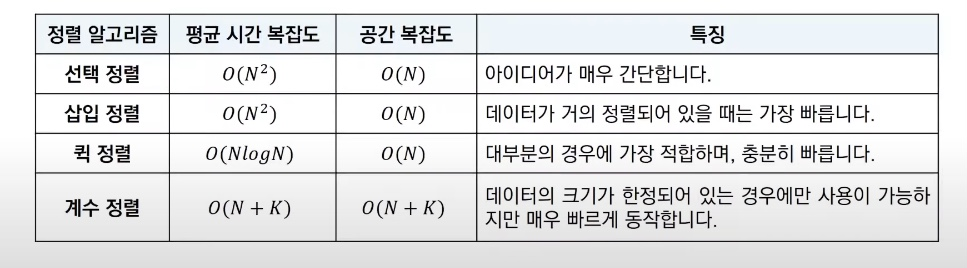

마지막으로, 표준 라이브러리에 있는 정렬 메서드는 최악의 경우도 O(NlogN)을 보장하기 때문에, 엔간하면 그거 쓰자.

>1. **정렬 라이브러리로 풀 수 있는 문제**
    - sort() 사용 방법 알고 있으면 어렵지 않다.
>2. **정렬 알고리즘의 원리에 대해 물어보는 문제**
    - 선택정렬, 삽입정렬, 퀵 정렬 등의 원리를 알고있어야 문제를 풀 수 있다.
>3. **더 빠른 정렬이 필요한 문제**
    - 퀵 정렬 기반의 문제는 풀 수 없으며, 계수 정렬 등의 다른 정렬 알고리즘을 이용하거나, 문제에서 기존에 알려진 알고리즘의 구조적인 개선을 거쳐야 풀 수 있다.